# **Cuans Bank Customer Attrition Prediction Model**

---

## 1. Project Overview

* **Business Context:**

Customer attrition, also known as customer churn, is a significant challenge for banks and financial institutions. It refers to the phenomenon where customers stop using a bank's services, leading to a loss of revenue and potentially harming the bank's reputation. Cuans Bank faces a similar challenge and aims to proactively address customer attrition to enhance customer retention and overall business performance.

* **Data Source:**

The project will utilize a dataset named "bank_churn_data.csv" containing information on 10,000 rows. This dataset includes 21 columns capturing customer profiles (age, gender, education, marital status, income, etc.), account details (credit limit, card category, months on book, etc.), and customer activity (transactions, inactivity periods, contacts with the bank, etc.).

* **Objective:**

  * **Identify Key Drivers of Attrition:** Determine the features that have the most significant impact on customer churn, providing insights into the factors leading to attrition.
  * **Develop a Predictive Model:** Build a robust machine learning model that accurately predicts customers at high risk of attrition. The model should prioritize high recall, F1-score, and a low False Negative Rate to minimize the chances of missing potential churn cases.
  * **Gain Actionable Insights:** Understand the underlying patterns and relationships between customer behavior and attrition to inform targeted retention strategies. And develop specific recommendations on how to mitigate the issues found.

* **Expected Outcomes:**

  * A predictive model capable of identifying customers at high risk of attrition.
  * Identification of key features influencing customer churn.
  * Actionable recommendations for targeted retention strategies.
  * A reduction in customer churn rate.
  * Improved customer retention and overall profitability for Cuans Bank.

* **Methodology:**

  * **Data Wrangling:** Initial data exploration, cleaning, and preparation for analysis.
  * **Data Pre-processing:** Handling missing values, outliers, and transforming data into a suitable format for modeling.
  * **Exploratory Data Analysis (EDA):** Investigating data patterns, relationships, and distributions to gain insights into customer behavior and attrition factors.
  * **Model Building:** Training and evaluating various machine learning models, including Logistic Regression, Random Forest, and XGBoost, to identify the best-performing model.
  * **Model Evaluation:** Assessing model performance using metrics such as recall, F1-score, and the confusion matrix, focusing on minimizing false negatives.
  * **Model Interpretation:** Utilizing techniques like Permutation Feature Importance and Partial Dependence Plots to understand the model's predictions and the influence of key features.
  * **Actionable Recommendations:** Formulating data-driven strategies to address the identified attrition drivers and improve customer retention.

By successfully completing this project, Cuans Bank will gain valuable insights into customer attrition, enabling proactive and targeted retention efforts. This will contribute to a reduction in churn rates, improved customer loyalty, and enhanced profitability for the bank. The developed predictive model and actionable recommendations will empower Cuans Bank to make data-driven decisions and strengthen its customer relationships.

---

## 2. Data Wrangling

### 2.1. Import Libraries

In [1]:
!pip install scikit-learn==1.2.2
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import dalex as dx
import scikitplot as skplt
import shap
from lime.lime_tabular import LimeTabularExplainer

pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", "{:.2f}".format)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 54.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependenc

### 2.2. Load Dataset

In [2]:
df = pd.read_csv('bank_churn_data.csv')
df.head()

user_id     attrition_flag  customer_age gender  dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  education_level marital_status income_category card_category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   months_on_book  total_relationship_count  months_inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   contacts_count_12_mon  credit_limit  total_revolving_bal  avg_open_to_buy  \
0                      3      12691.00                  777         11914.00   
1                      2       8256.00                  864          7392.00   
2                      0       3418.00                    0          3418.00   
3                      1       3313.00                 2517           796.00   
4                      0       4716.00                    0          4716.00   

   total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  \
0                  1.33             1144              42                 1.62   
1                  1.54             1291              33                 3.71   
2                  2.59             1887              20                 2.33   
3                  1.41             1171              20                 2.33   
4                  2.17              816              28                 2.50   

   avg_utilization_ratio  
0                   0.06  
1                   0.10  
2                   0.00  
3                   0.76  
4                   0.00

### 2.3. Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [4]:
df.shape

(10127, 21)

In [5]:
df.describe().T

count         mean         std          min  \
user_id                  10127.00 739177606.33 36903783.45 708082083.00   
customer_age             10127.00        46.33        8.02        26.00   
dependent_count          10127.00         2.35        1.30         0.00   
months_on_book           10127.00        35.93        7.99        13.00   
total_relationship_count 10127.00         3.81        1.55         1.00   
months_inactive_12_mon   10127.00         2.34        1.01         0.00   
contacts_count_12_mon    10127.00         2.46        1.11         0.00   
credit_limit             10127.00      8631.95     9088.78      1438.30   
total_revolving_bal      10127.00      1162.81      814.99         0.00   
avg_open_to_buy          10127.00      7469.14     9090.69         3.00   
total_amt_chng_q4_q1     10127.00         0.76        0.22         0.00   
total_trans_amt          10127.00      4404.09     3397.13       510.00   
total_trans_ct           10127.00        64.86       23.47        10.00   
total_ct_chng_q4_q1      10127.00         0.71        0.24         0.00   
avg_utilization_ratio    10127.00         0.27        0.28         0.00   

                                  25%          50%          75%          max  
user_id                  713036770.50 717926358.00 773143533.00 828343083.00  
customer_age                    41.00        46.00        52.00        73.00  
dependent_count                  1.00         2.00         3.00         5.00  
months_on_book                  31.00        36.00        40.00        56.00  
total_relationship_count         3.00         4.00         5.00         6.00  
months_inactive_12_mon           2.00         2.00         3.00         6.00  
contacts_count_12_mon            2.00         2.00         3.00         6.00  
credit_limit                  2555.00      4549.00     11067.50     34516.00  
total_revolving_bal            359.00      1276.00      1784.00      2517.00  
avg_open_to_buy               1324.50      3474.00      9859.00     34516.00  
total_amt_chng_q4_q1             0.63         0.74         0.86         3.40  
total_trans_amt               2155.50      3899.00      4741.00     18484.00  
total_trans_ct                  45.00        67.00        81.00       139.00  
total_ct_chng_q4_q1              0.58         0.70         0.82         3.71  
avg_utilization_ratio            0.02         0.18         0.50         1.00

In [6]:
df.describe(include='object').T

count unique                top  freq
attrition_flag   10127      2  Existing Customer  8500
gender           10127      2                  F  5358
education_level  10127      7           Graduate  3128
marital_status   10127      4            Married  4687
income_category  10127      6     Less than $40K  3561
card_category    10127      4               Blue  9436

The dataset of Bank with churn cases describes of:

**Customer Profile & Account**
* `user_id:` customer account number.
* `attrition_flag:` customer status (Existing and Attrited).
* `customer_age:` age of the customer.
* `gender:` gender of customer (M for male and F for female).
* `dependent_count:` number of dependents of customers.
* `education_level:` customer education level (Uneducated, High School, Graduate, College, Post-Graduate, Doctorate, and Unknown).
* `marital_status:` customer's marital status (Single, Married, Divorced, and Unknown).
* `income_category:` customer income interval category (Less than $40k, $40k-$60k, $60k-$80k, $80k-$120k, $120k +, and Unknown).
* `card_category:` type of card used (Blue, Silver, Gold, and Platinum).
months_on_book: period of being a customer (in months).

**Customer Activity**
* `months_on_book:` how many months they've been a customer.
* `total_relationship_count:` the number of products used by customers in the bank.
* `months_inactive_12_mon:` period of inactivity for the last 12 months.
* `contacts_count_12_mon:` the number of interactions between the bank and the customer in the last 12 months.
* `credit_limit:` credit card transaction nominal limit in one period.
* `total_revolving_bal:` total funds used in one period.
* `avg_open_to_buy:` the difference between the credit limit set for the cardholder's account and the current balance.
* `total_amt_chng_q4_q1:` increase in customer transaction nominal between quarter 4 and quarter 1.
* `total_trans_amt:` total nominal transaction in the last 12 months.
* `total_trans_ct:` the number of transactions in the last 12 months.
* `total_ct_chng_q4_q1:` the number of customer transactions increased between quarter 4 and quarter 1.
* `avg_utilization_ratio:` percentage of credit card usage.


### 2.4. Data Inspection

* Missing Values

In [7]:
df.isna().sum().sum()

0

* Duplicated Values

In [8]:
df.duplicated().sum()

0

**The dataset is clean**

## 3. Data Pre-processing

### 3.1. Data Splitting

In [9]:
X = df.drop(['user_id', 'attrition_flag'], axis=1)
y = df['attrition_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000, stratify=y)

In [10]:
y_train.value_counts()

attrition_flag
Existing Customer    6799
Attrited Customer    1302
Name: count, dtype: int64

In [11]:
y_test.value_counts()

attrition_flag
Existing Customer    1701
Attrited Customer     325
Name: count, dtype: int64

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 19), (2026, 19), (8101,), (2026,))

### 3.2. Exploratory Data Analysis

In [13]:
train_data = X_train.merge(y_train.rename('target_variable'), left_index=True, right_index=True)

#### 3.2.1. Churn Distribution

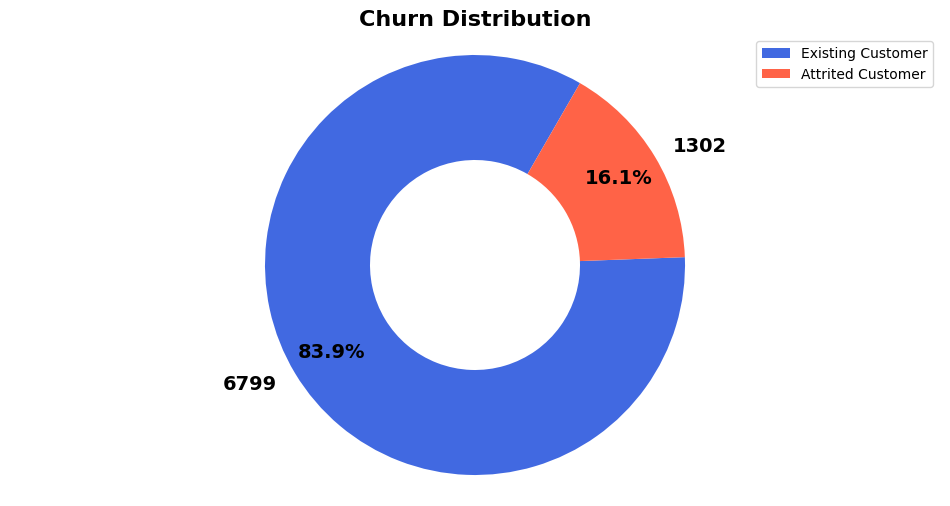

In [14]:
plt.figure(figsize=(12, 6))
churn_count = train_data['target_variable'].value_counts().reset_index()
churn_count.columns = ['target_variable', 'count']
labels = churn_count['count']
values = churn_count['count']
plt.pie(values, autopct='%1.1f%%', textprops={'fontsize': 14, 'fontweight': 'bold'}, labels=labels,
        colors=['royalblue', 'tomato'], wedgeprops=dict(width=0.5), pctdistance=0.8, startangle=60)
plt.title('Churn Distribution', fontsize=16, fontweight='bold')
plt.legend(labels=churn_count['target_variable'], loc='best')
plt.axis('equal')
plt.show()

#### 3.2.2. `customer_age` vs Churn

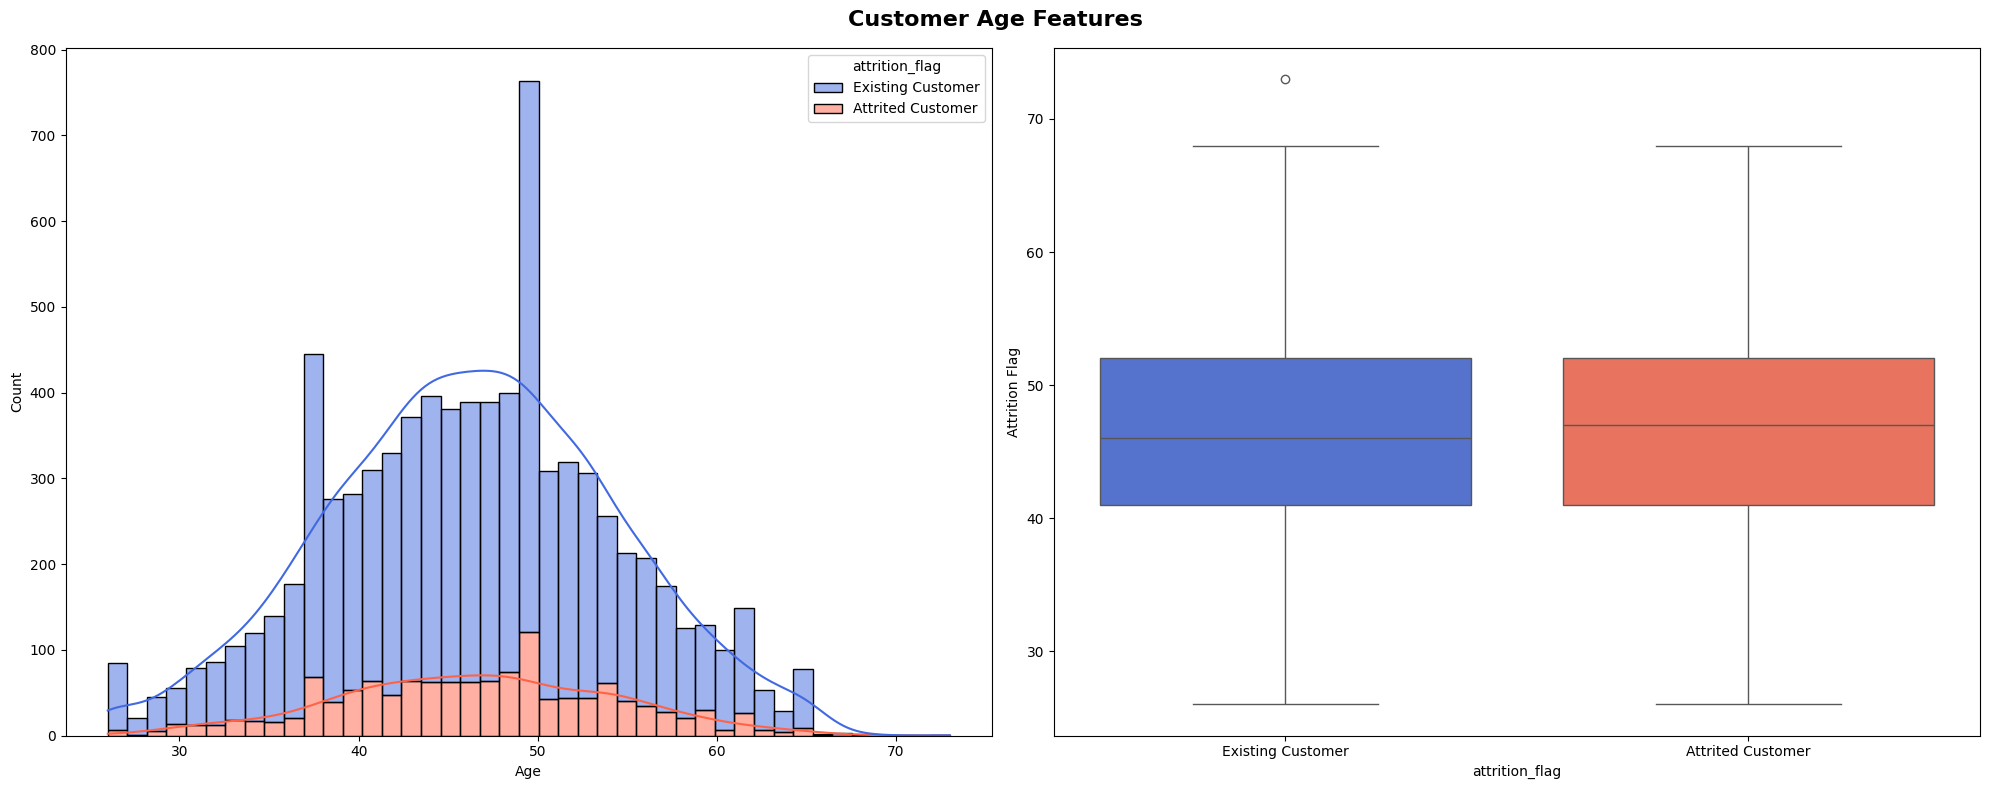

Average of Customer Age:  46.32514504382175
Mode of Customer Age:  48


In [15]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.suptitle('Customer Age Features', fontsize=16, fontweight='bold')

sns.boxplot(data=X_train, y='customer_age', x=y_train, ax=axs[1], palette=['royalblue', 'tomato'])
axs[1].set_ylabel('Age')
axs[1].set_ylabel('Attrition Flag')

sns.histplot(data=X_train, x='customer_age', hue=y_train, multiple="stack", kde=True, ax=axs[0], palette=['royalblue', 'tomato'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')

plt.tight_layout()
plt.show()

print('Average of Customer Age: ', X_train['customer_age'].mean())
print('Mode of Customer Age: ', X_train['customer_age'].mode()[0])

`customer_age` is **normally distributed**. And the age **range of 40-55 years tends to be high for churn**.

#### 3.2.3. `education_level` and `incomce_category` correlation

In [16]:
def barplot_percentage(data, x, hue, ax, title):
  grouped_data = data.groupby([x, hue]).size().reset_index(name='Count')
  total_customers = grouped_data.groupby(x)['Count'].sum().reset_index(name='Total')
  grouped_data = grouped_data.merge(total_customers, on=x)
  grouped_data['Percentage'] = (grouped_data['Count'] / grouped_data['Total']) * 100

  ax = sns.barplot(x=x, y='Percentage', hue=hue, data=grouped_data, ax=ax, palette=['tomato', 'royalblue'])
  for p in ax.containers:
      for bar in p:
          height = bar.get_height()
          percentage = f'{height:.1f}%'
          ax.annotate(percentage, (bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
  ax.set_xlabel(x)
  ax.set_ylabel('Churn Rate')
  ax.set_title(title)
  ax.set_ylim(0, 100)
  ax.legend(loc='upper right', bbox_to_anchor=(0.68, 1.01), ncol=len(data[hue].unique()))

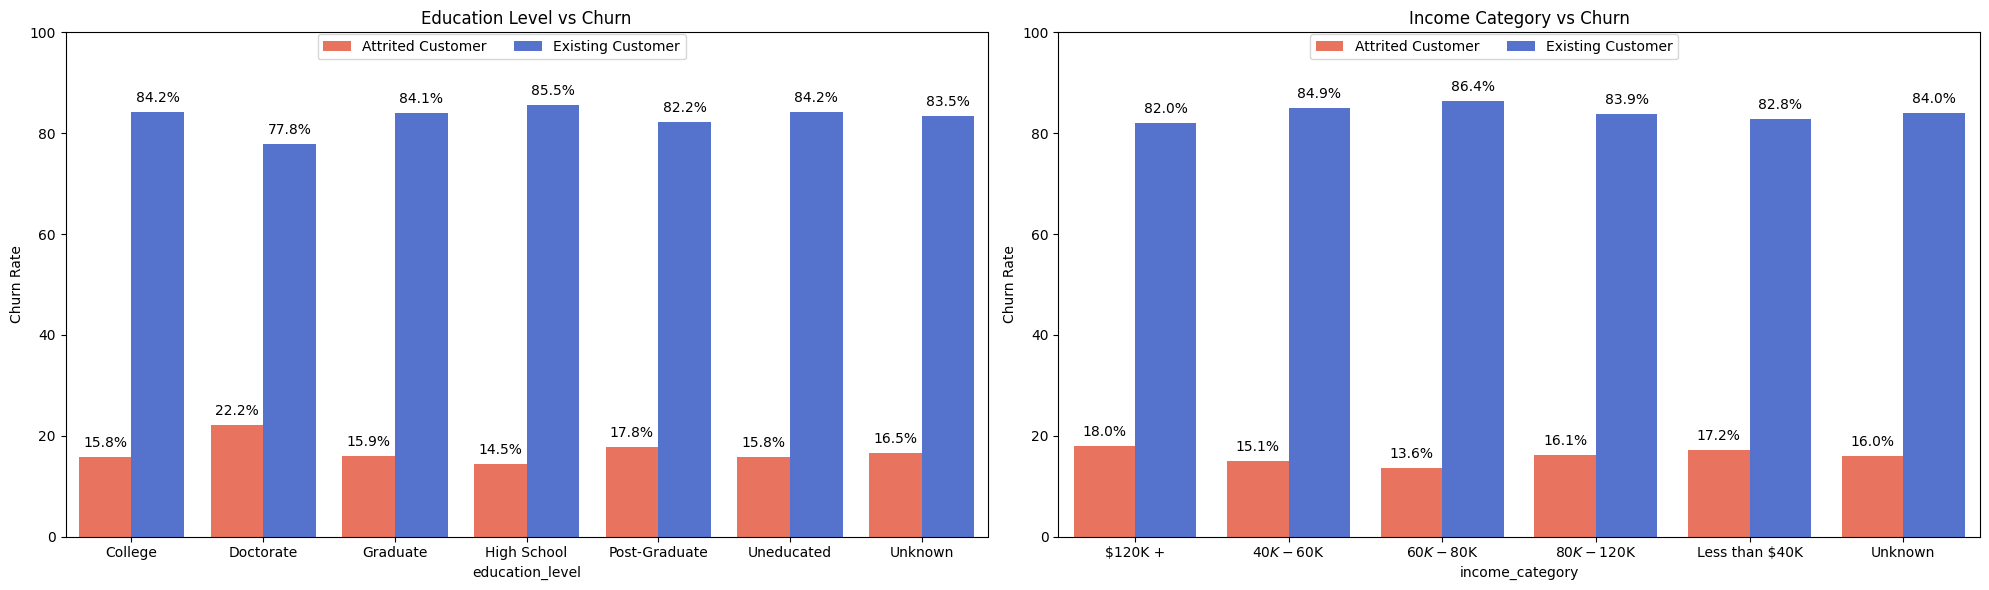

Education Level vs Churn Rate
 target_variable  Attrited Customer  Existing Customer
education_level                                      
College                        127                676
Doctorate                       83                291
Graduate                       397               2097
High School                    234               1384
Post-Graduate                   73                336
Uneducated                     186                993
Unknown                        202               1022
------------------------------------------------------------
Income Category vs Churn Rate
 target_variable  Attrited Customer  Existing Customer
income_category                                      
$120K +                        104                473
$40K - $60K                    216               1217
$60K - $80K                    156                994
$80K - $120K                   197               1023
Less than $40K                 490               2362
Unknown      

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

barplot_percentage(train_data, 'education_level', 'target_variable', ax=axs[0], title='Education Level vs Churn')
barplot_percentage(train_data, 'income_category', 'target_variable', ax=axs[1], title='Income Category vs Churn')

plt.tight_layout()
plt.show()

edu = train_data.groupby('education_level')['target_variable'].value_counts().unstack('target_variable')
inc = train_data.groupby('income_category')['target_variable'].value_counts().unstack('target_variable')
print('Education Level vs Churn Rate\n',edu)
print('---'*20)
print('Income Category vs Churn Rate\n',inc)

In [18]:
from scipy.stats import spearmanr

education_order = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

train_data['education_level_encoded'] = pd.Categorical(train_data['education_level'], categories=education_order, ordered=True).codes
train_data['income_category_encoded'] = pd.Categorical(train_data['income_category'], categories=income_order, ordered=True).codes

correlation, p_value = spearmanr(train_data['education_level_encoded'], train_data['income_category_encoded'])

print(f"Spearman correlation between Education Level and Income Category: {correlation:.2f}")
print(f"P-value: {p_value:.2f}")

Spearman correlation between Education Level and Income Category: -0.01
P-value: 0.23


From spearman correlation, it can be concluded that **there is no significant correlation between `education_level` and `income_category`**. Although there is a very small negative correlation (-0.01), this correlation is not statistically significant.

Therefore, it can be said that the higher the `education_level`, the `income_category` is not higher too. Those 2 fetures do not seem to be significantly related.

And from the countplot above those **two features also don't have a significant impact/influence on the predictor/target features `attrition_flag`**.

#### 3.2.4. `gender` vs Churn

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(12, 6))

barplot_percentage(train_data, 'gender', 'target_variable', axs, title='Gender vs Churn')

plt.tight_layout()
plt.show()

train_data.groupby('gender')['target_variable'].value_counts().unstack('target_variable')

target_variable  Attrited Customer  Existing Customer
gender                                               
F                              724               3525
M                              578               3274

**There is no significant different churn influence/impact between gender to target features `attrition_flag`**. However, female customers have a slightly bigger churn than males, it's normal because the proportion of females is bigger.

#### 3.2.5. `months_on_book` vs Churn

In [20]:
train_data['months_spent_segment'] = pd.qcut(train_data['months_on_book'], 3, labels=['Short', 'Medium', 'Long'])

min = train_data.groupby('months_spent_segment')['months_on_book'].min()
max = train_data.groupby('months_spent_segment')['months_on_book'].max()

month_segment = pd.concat([min, max], axis=1)
month_segment.columns = ['Min', 'Max']

months = train_data \
    .groupby('months_spent_segment')['target_variable'] \
    .value_counts(normalize=True) \
    .sort_values(ascending=False) \
    .unstack('target_variable')

train_data['months_spent_segment'].value_counts()

months_spent_segment
Medium    2818
Short     2753
Long      2530
Name: count, dtype: int64

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(12, 6))

barplot_percentage(train_data, 'months_spent_segment', 'target_variable', axs, title='Months Spent Segment vs Churn')

plt.tight_layout()
plt.show()

print(month_segment)
print('---'*20)
print('Months Spent vs Churn \n',train_data.groupby('months_spent_segment')['target_variable'].value_counts().unstack('target_variable'))

                      Min  Max
months_spent_segment          
Short                  13   34
Medium                 35   38
Long                   39   56
------------------------------------------------------------
Months Spent vs Churn 
 target_variable       Attrited Customer  Existing Customer
months_spent_segment                                      
Short                               403               2350
Medium                              491               2327
Long                                408               2122


**The longer a customer has been a customer at the bank (39-56 months) does not make the possibility of churn smaller**, the churn rate is only `16%`, not significantly different from customers in the short (15%) and medium (17%) month spent segments.

#### 3.2.6. `contacts_count_12_mon` vs Churn

In [22]:
train_data['contact_segment'] = pd.qcut(train_data['contacts_count_12_mon'], 3, labels=['Seldom', 'Sometime', 'Often'])

min = train_data.groupby('contact_segment')['contacts_count_12_mon'].min()
max = train_data.groupby('contact_segment')['contacts_count_12_mon'].max()

contact_segment_fq = pd.concat([min, max], axis=1)
contact_segment_fq.columns = ['Min', 'Max']

contact_churn_rate = train_data \
    .groupby('contact_segment')['target_variable'] \
    .value_counts(normalize=True) \
    .sort_values(ascending=False) \
    .unstack('target_variable')

train_data['contact_segment'].value_counts()

contact_segment
Seldom      4102
Sometime    2692
Often       1307
Name: count, dtype: int64

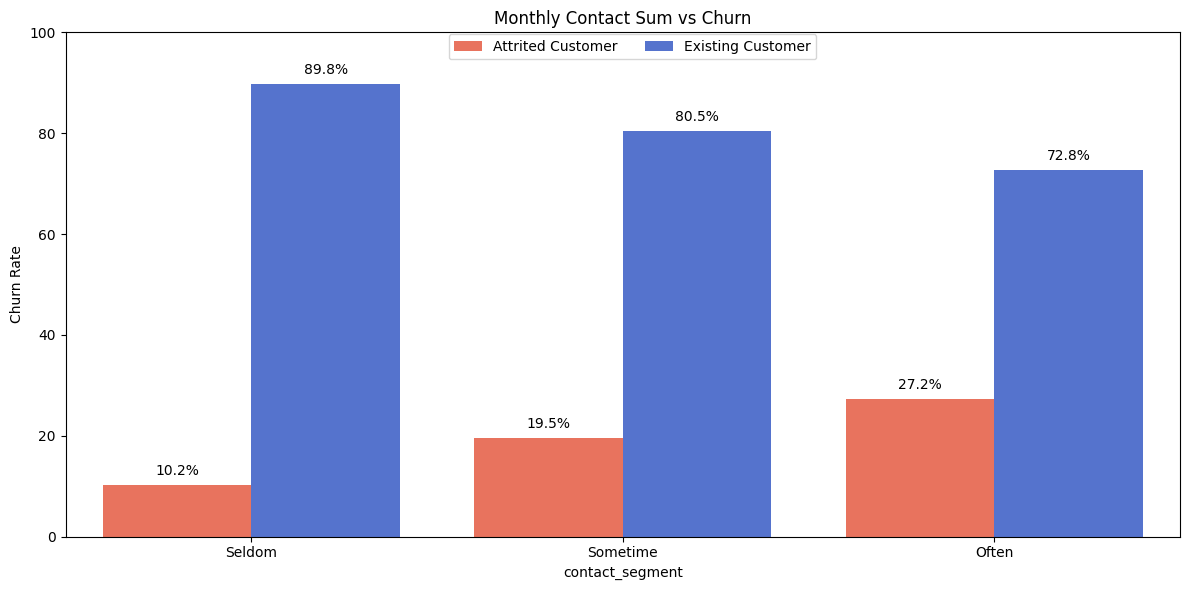

                 Min  Max
contact_segment          
Seldom             0    2
Sometime           3    3
Often              4    6
------------------------------------------------------------
Monthly Contact Sum vs Churn 
 target_variable  Attrited Customer  Existing Customer
contact_segment                                      
Seldom                         420               3682
Sometime                       526               2166
Often                          356                951


In [23]:
fig, axs = plt.subplots(1, 1, figsize=(12, 6))

barplot_percentage(train_data, 'contact_segment', 'target_variable', axs, title='Monthly Contact Sum vs Churn')

plt.tight_layout()
plt.show()

print(contact_segment_fq)
print('---'*20)
print('Monthly Contact Sum vs Churn \n',
      train_data.groupby('contact_segment')['target_variable'].value_counts().unstack('target_variable'))

**The more often (4-6 times) the customers interacted with the bank in one year, the more likely the customers were to churn** at a rate of `28%` compared to those who did so seldom or only sometime.

#### 3.2.7. `marital_status`, `dependent_count` vs Churn

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

barplot_percentage(train_data, 'marital_status', 'target_variable', ax=axs[0], title='Marital Status vs Churn')
barplot_percentage(train_data, 'dependent_count', 'target_variable', ax=axs[1], title='Dependant Count vs Churn')

plt.tight_layout()
plt.show()

mar = train_data.groupby('marital_status')['target_variable'].value_counts().unstack('target_variable')
dep = train_data.groupby('dependent_count')['target_variable'].value_counts().unstack('target_variable')
print('Marital Status vs Churn \n',mar)
print('---'*20)
print('Dependant Count vs Churn \n',dep)

Marital Status vs Churn 
 target_variable  Attrited Customer  Existing Customer
marital_status                                       
Divorced                        99                510
Married                        569               3183
Single                         528               2604
Unknown                        106                502
------------------------------------------------------------
Dependant Count vs Churn 
 target_variable  Attrited Customer  Existing Customer
dependent_count                                      
0                              113                618
1                              203               1228
2                              341               1795
3                              382               1810
4                              207               1059
5                               56                289


#### 3.2.8. `card_category` vs Churn

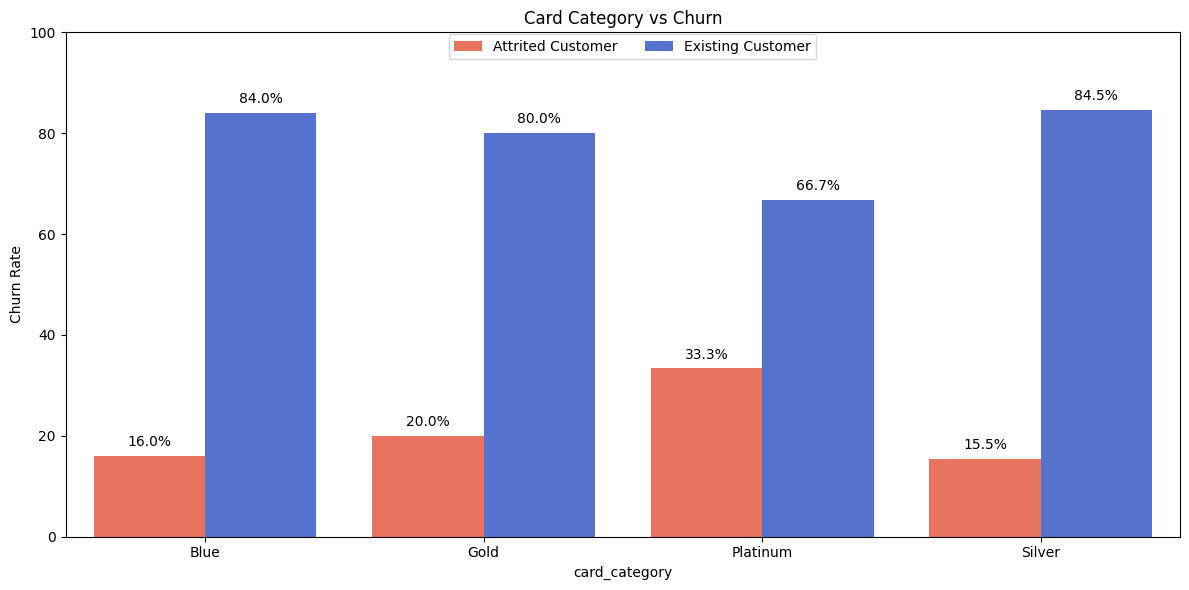

target_variable  Attrited Customer  Existing Customer
card_category                                        
Blue                          1212               6351
Gold                            18                 72
Platinum                         5                 10
Silver                          67                366

In [25]:
fig, axs = plt.subplots(1, 1, figsize=(12, 6))

barplot_percentage(train_data, 'card_category', 'target_variable', axs, title='Card Category vs Churn')

plt.tight_layout()
plt.show()

train_data.groupby('card_category')['target_variable'].value_counts().unstack('target_variable')

**Customers with Platinum card tend to churn (33 %)** than the others card category.

#### 3.2.9. Numerical Features vs Churn

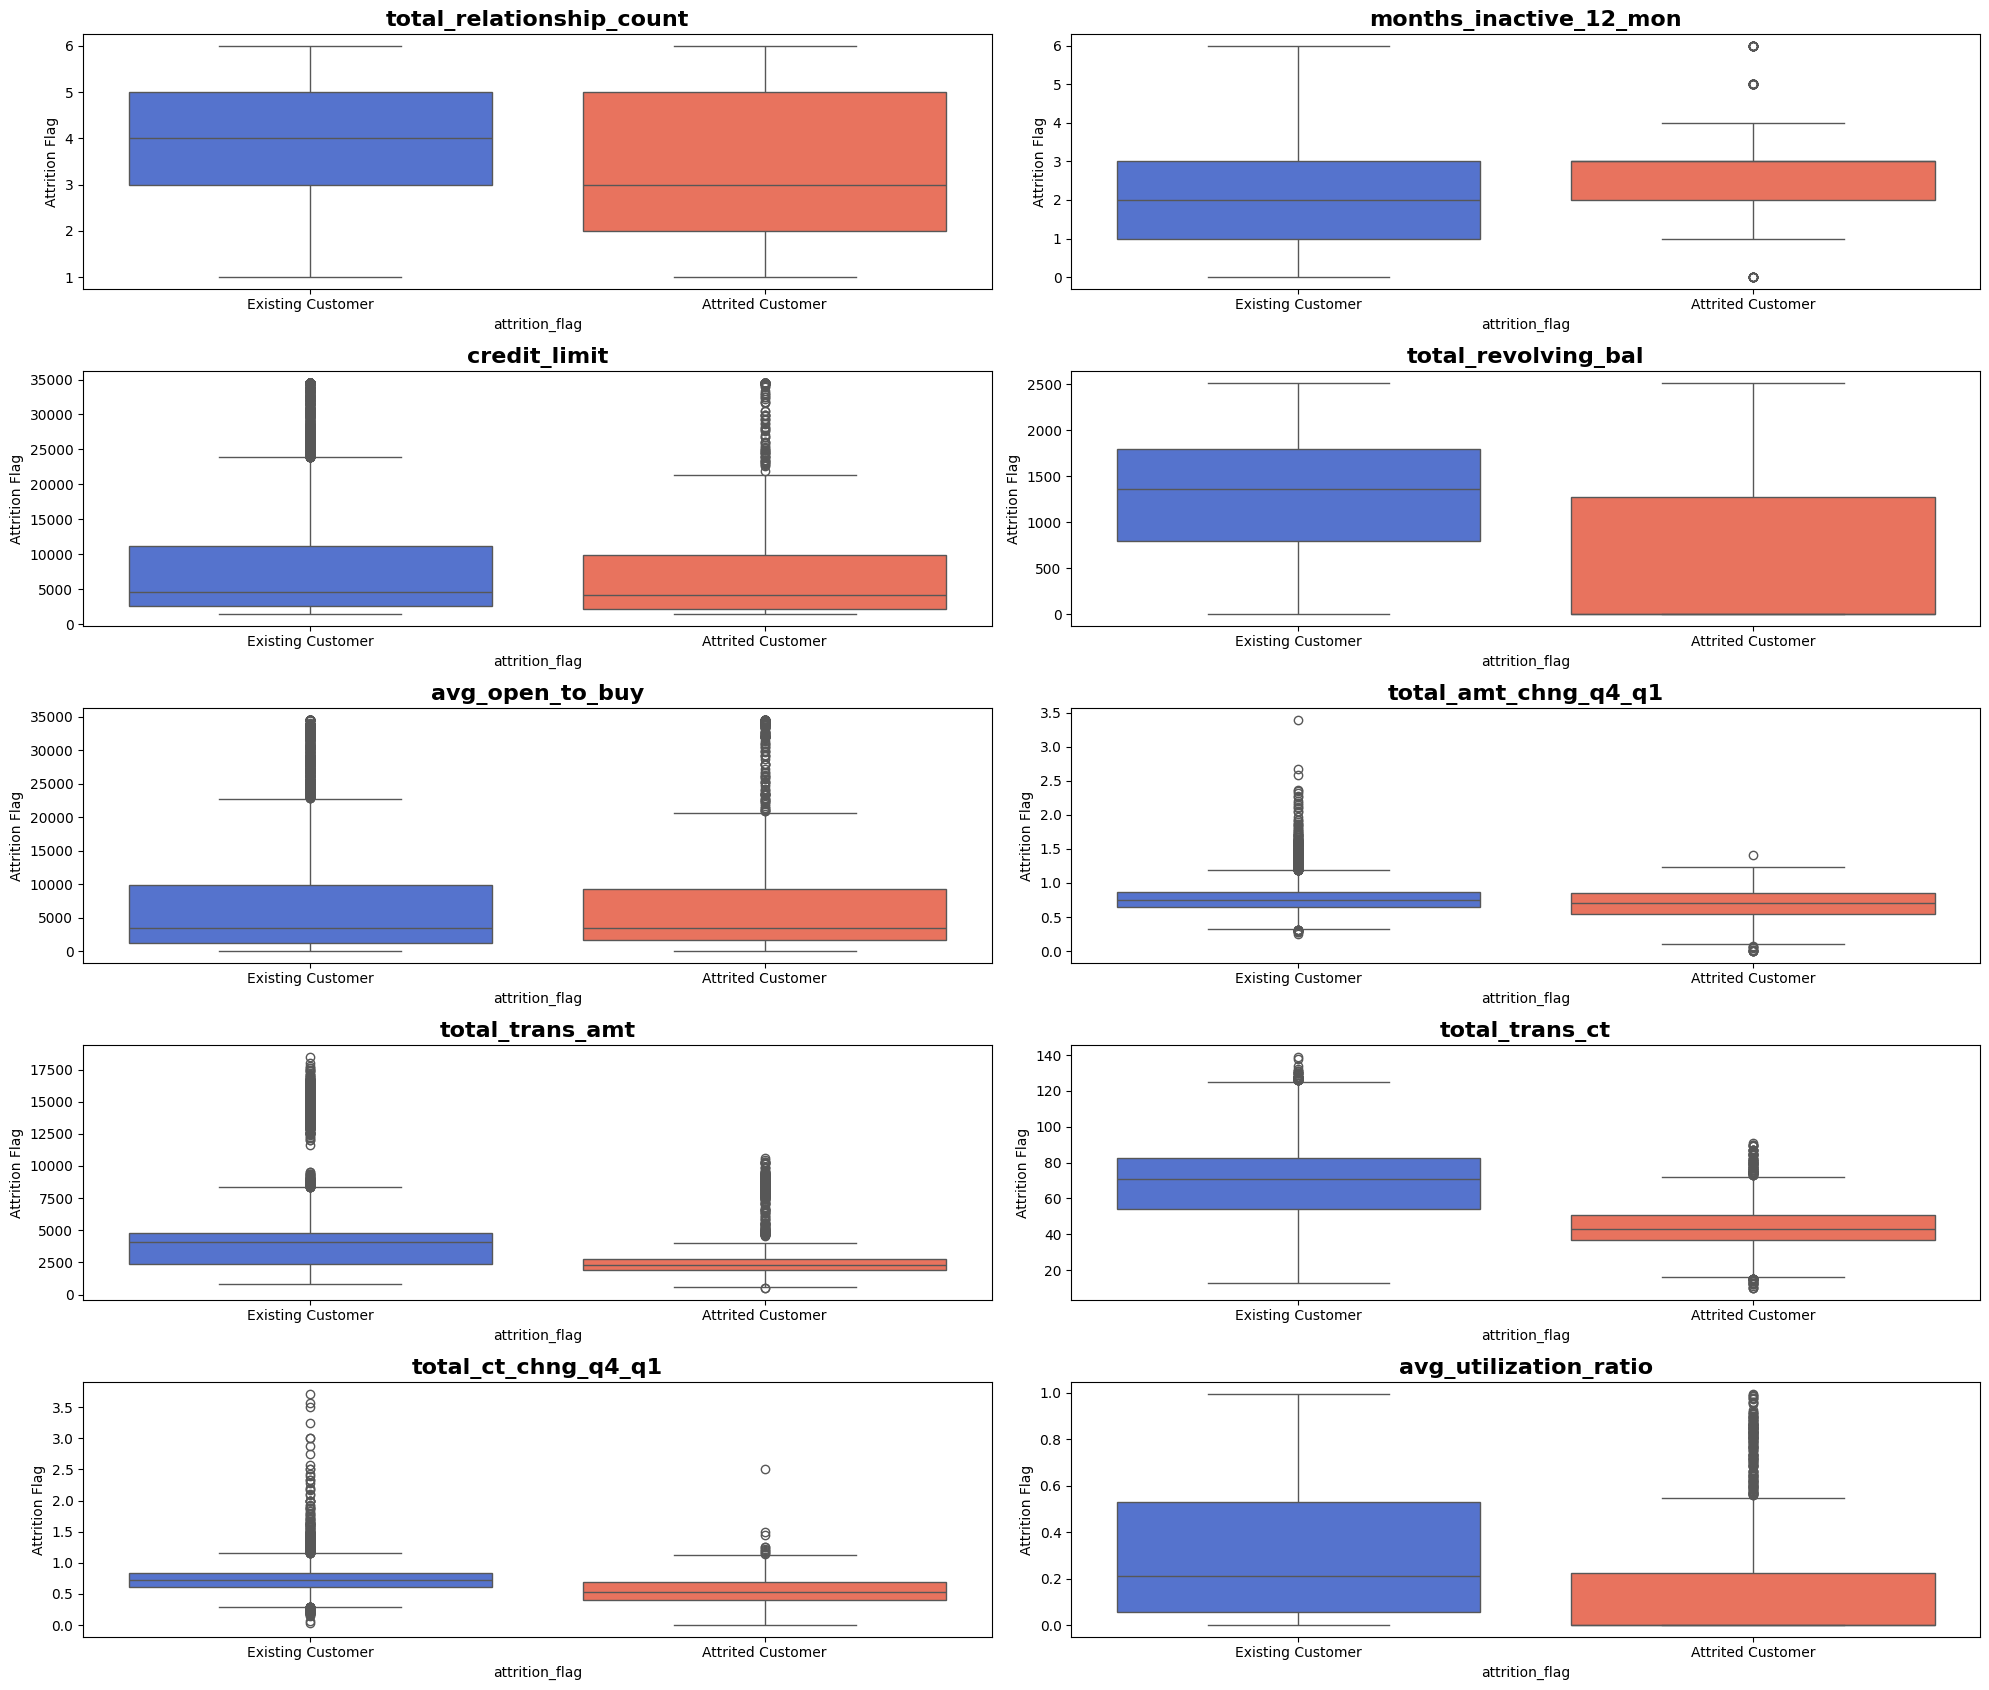

In [26]:
num = ['total_relationship_count', 'months_inactive_12_mon', 'credit_limit','total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct',
       'total_ct_chng_q4_q1', 'avg_utilization_ratio']

fig, axs = plt.subplots(5, 2, figsize=(20, 17))
for i, col in enumerate(num):
    sns.boxplot(x=y_train, y=col, data=X_train, ax=axs[i//2, i%2], palette=['royalblue', 'tomato'])
    axs[i//2, i%2].set_ylabel(col)
    axs[i//2, i%2].set_ylabel('Attrition Flag')
    axs[i//2, i%2].set_title(col, fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

- `total_relationship_count:` Both groups have a similar distribution, with the median slightly higher for Existing Customers.

- `months_inactive_12_mon:` Attrited Customers have a higher median and a wider distribution compared to Existing Customers. This suggests that inactivity for a longer period is associated with customer churn.

- `credit_limit:` Existing Customers have a slightly higher median credit limit.

- `total_revolving_bal:` Attrited Customers have a slightly higher median revolving balance. The distribution for Attrited Customers is wider, suggesting more variability in revolving balances.

- `avg_open_to_buy:` Existing Customers have a higher median average open-to-buy amount. The distribution for Attrited Customers is more spread out.

- `total_amt_chng_q4_q1:` Both groups have a similar distribution, with a slightly higher median for Attrited Customers. There are some outliers for both groups.

- `total_trans_amt:` Existing Customers have a higher median total transaction amount. The distribution for Attrited Customers is more spread out.

- `total_trans_ct:` Existing Customers have a higher median total transaction count. The distribution for Attrited Customers is more spread out.

- `total_ct_chng_q4_q1:` Both groups have a similar distribution, with a slightly higher median for Attrited Customers. There are some outliers for both groups.

- `avg_utilization_ratio:` Attrited Customers have a higher median average utilization ratio. The distribution for Attrited Customers is more spread out.

#### 3.2.10. EDA Summary

**Key Findings:**

* **Customer Age:** The age distribution is normal. The age range of 40-55 years tends to have a higher churn rate.

* **Education Level and Income Category:** There is no significant correlation between education level and income category. Neither of these features has a strong individual impact on churn.

* **Gender:** There is no significant difference in churn rate between genders, though females have a slightly higher churn rate, likely due to their higher representation in the dataset.

* **Months on Book:** The length of time a customer has been with the bank does not significantly impact churn. The churn rate for long-term customers (39-56 months) is only slightly lower than for shorter-term customers.

* **Contacts Count (12 Months):** Customers who had more frequent contact with the bank in the past year (4-6 times) tend to have a higher churn rate (28%) compared to those with less frequent contact. Frequent contact with the bank might be associated with customer dissatisfaction or issues.

* **Marital and Dependent:** There were no significants impact/influence from features marital_status and dependent_count to target attrition_flag.

* **Card Category:** Platinum card's customers tend to churn (33 %) than the others.

* **Other Num Features:** Features like `months_inactive_12_mon`, `total_revolving_bal`, `avg_open_to_buy`, `total_trans_ct`, and `avg_utilization_ratio` show distinct differences between Existing and Attrited Customers. These features could be potential predictors of customer churn.


### 3.3. Outlier Handling

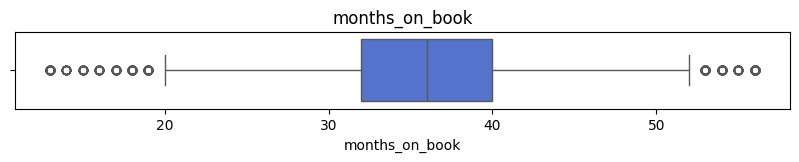

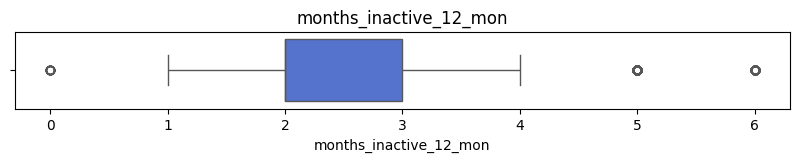

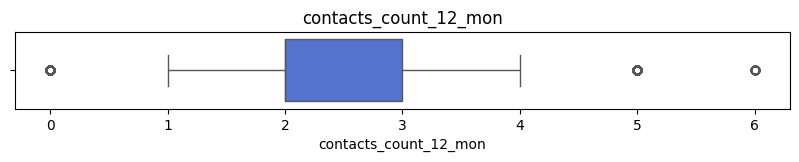

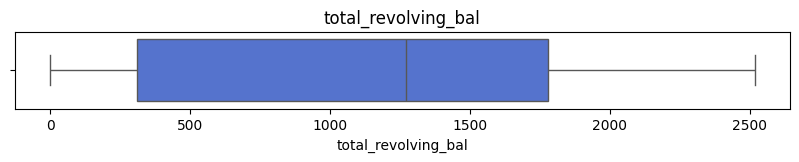

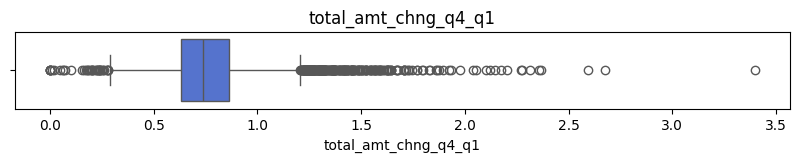

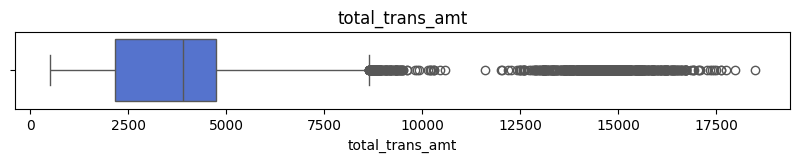

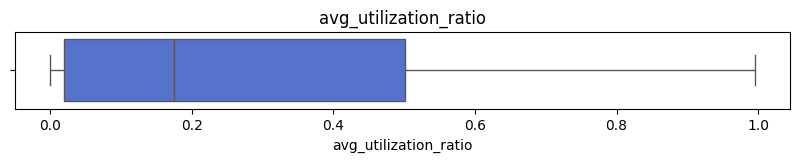

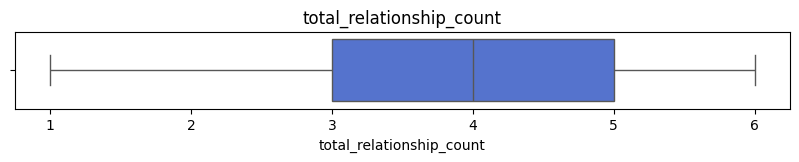

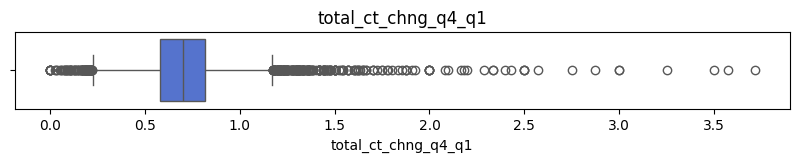

In [27]:
num_cols = ['customer_age', 'months_on_book', 'months_inactive_12_mon', 'contacts_count_12_mon',
            'total_revolving_bal', 'total_amt_chng_q4_q1', 'total_trans_amt','avg_utilization_ratio',
            'total_relationship_count', 'total_ct_chng_q4_q1']

for col in num_cols:
  plt.figure(figsize=(10, 1))
  sns.boxplot(x=col, data=X_train, orient='h', color='royalblue')
  plt.title(col)
  plt.show()

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 19), (2026, 19), (8101,), (2026,))

**Remove outliers based on IQR**

In [29]:
def remove_outliers_iqr(data, target, columns, threshold=1.5):
    original_index = data.index

    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

    target = target[target.index.isin(data.index)]

    data = data.reset_index(drop=True)
    target = target.reset_index(drop=True)

    return data, target

X_train, y_train = remove_outliers_iqr(X_train, y_train, ['total_amt_chng_q4_q1', 'total_ct_chng_q4_q1', 'total_trans_amt'])

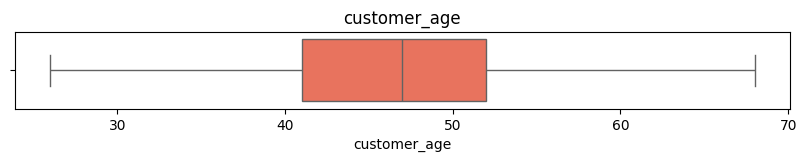

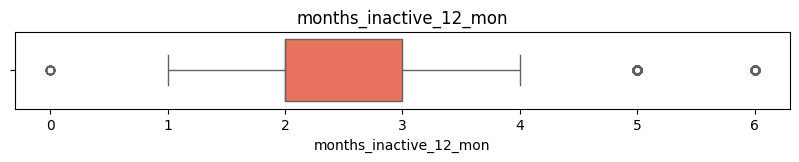

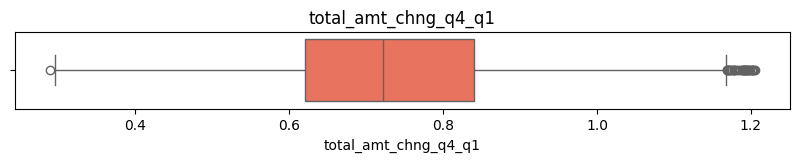

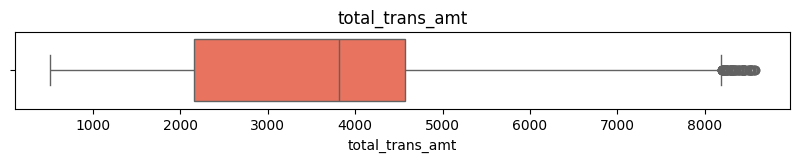

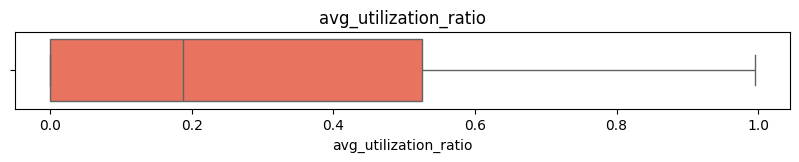

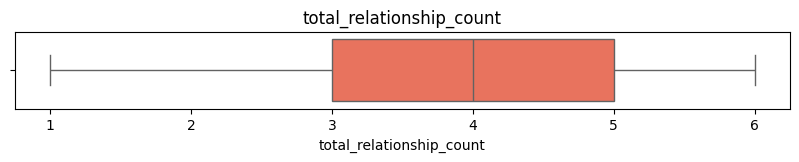

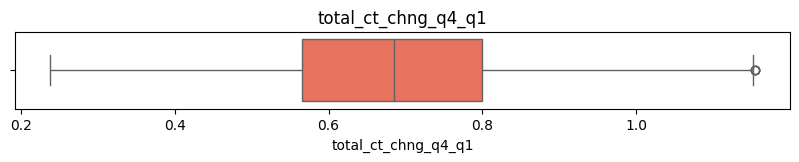

In [30]:
for col in num_cols:
  plt.figure(figsize=(10, 1))
  sns.boxplot(x=col, data=X_train, orient='h', color='tomato')
  plt.title(col)
  plt.show()

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6795, 19), (2026, 19), (6795,), (2026,))

### 3.4. Feature Selection

#### 3.4.1. Correlation Analysis

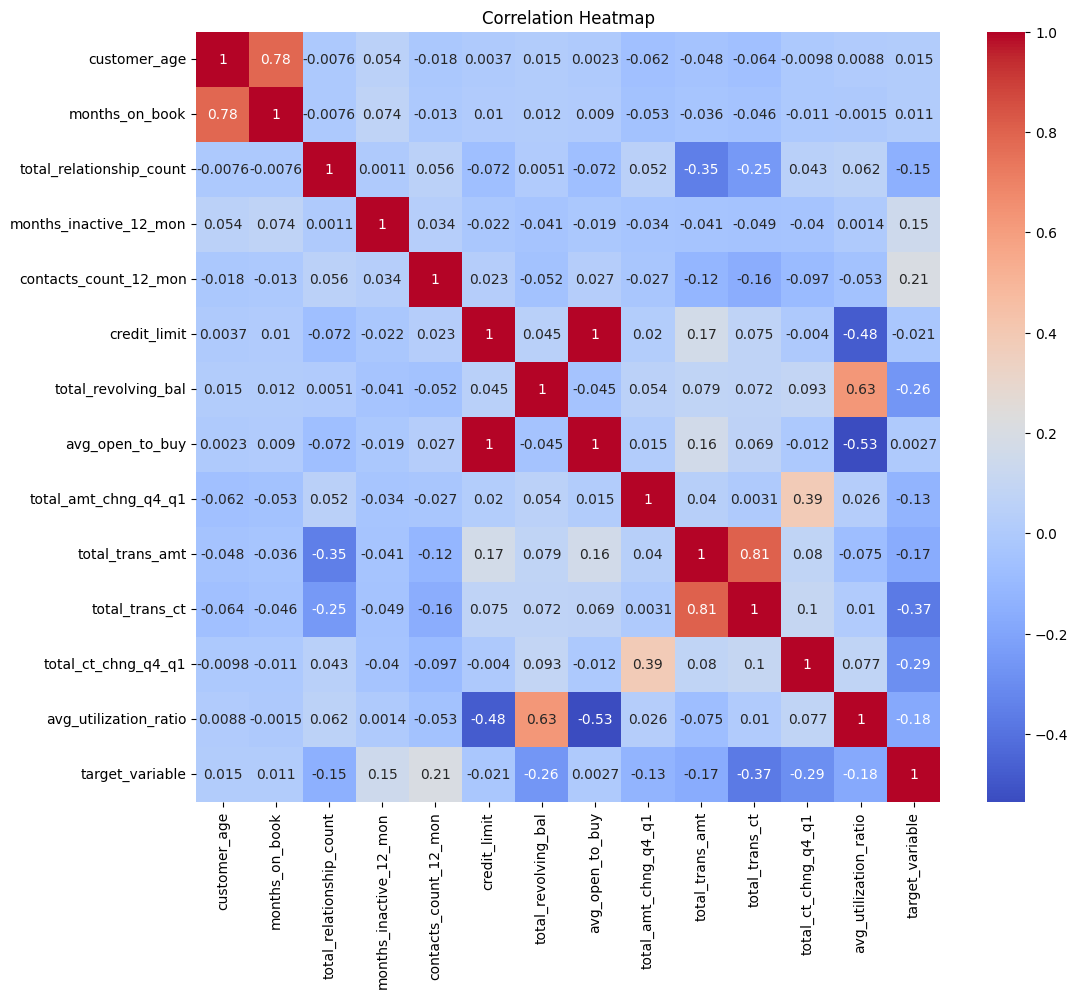

In [32]:
train_data['target_variable'] = train_data['target_variable'].map({'Existing Customer': 0, 'Attrited Customer': 1})
train_corr = train_data.drop(['gender', 'education_level', 'marital_status', 'income_category', 'card_category', 'dependent_count',
                              'months_spent_segment', 'contact_segment', 'education_level_encoded', 'income_category_encoded'],
                             axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(train_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In the heatmap, we can see strong correlations between:
* `total_trans_amt` and `total_trans_ct` (0.82)
* `avg_open_to_buy` and `credit_limit` (1)
* `customer_age` and `months_on_book` (0.78)

Based on those correlation with the target_variable (`attrition_flag`). We'll drop `avg_open_to_buy`, `months_on_book`, and `total_trans_ct` features.

In [33]:
X_train = X_train.drop(['avg_open_to_buy', 'total_trans_ct', 'months_on_book'], axis=1)
X_test = X_test.drop(['avg_open_to_buy', 'total_trans_ct', 'months_on_book'], axis=1)

And I'll drop features that don't significantly impact the target variable `attrition_flag` based on EDA summary above. The aims is to avoid complexity, simplify the model, making it easier to interpret and potentially improving performance by reducing noise. Then we'll be coomparing the models with and without these features using metrics.

In [34]:
keep = ['customer_age', 'months_inactive_12_mon', 'contacts_count_12_mon',
        'total_revolving_bal', 'total_amt_chng_q4_q1', 'total_trans_amt',
        'total_relationship_count', 'total_ct_chng_q4_q1', 'credit_limit']

X_train = X_train[keep]
X_test = X_test[keep]

In [35]:
train_corr = train_data.drop(['gender', 'education_level', 'marital_status', 'income_category', 'card_category', 'dependent_count',
                              'months_spent_segment', 'contact_segment', 'education_level_encoded', 'income_category_encoded',
                              'credit_limit', 'total_trans_ct', 'months_on_book', 'avg_utilization_ratio'], axis=1).corr()
train_data['target_variable'] = train_data['target_variable'].map({'Existing Customer': 0, 'Attrited Customer': 1})

plt.figure(figsize=(12, 10))
sns.heatmap(train_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6795, 9), (2026, 9), (6795,), (2026,))

### 3.5. Feature Encoding

In [37]:
X_train.head(1)

customer_age  months_inactive_12_mon  contacts_count_12_mon  \
0            38                       1                      3   

   total_revolving_bal  total_amt_chng_q4_q1  total_trans_amt  \
0                 2266                  0.92             1388   

   total_relationship_count  total_ct_chng_q4_q1  credit_limit  
0                         4                 0.93      19259.00

In [38]:
label_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}

y_train = y_train.map(label_mapping).rename('attrition_flag')
y_test = y_test.map(label_mapping).rename('attrition_flag')

y_train.value_counts(normalize=True)

attrition_flag
0   0.83
1   0.17
Name: proportion, dtype: float64

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6795, 9), (2026, 9), (6795,), (2026,))

## 4. Model Building

I'll use 3 Tree-Based models below to compare and choose the best performance model.

### 4.1. Decision Tree

In [40]:
model_dt = DecisionTreeClassifier(random_state = 1000)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1000)

### 4.2. Random Forest

In [41]:
model_rf = RandomForestClassifier(random_state = 1000)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1000)

### 4.3. XGBoost

In [42]:
model_xgb = XGBClassifier(random_state = 1000)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1000, ...)

## 5. Model Evaluation

Since we acknowledge the **dataset imbalance, where class 0 ( "Existing Customer") has significantly more samples than the class 1 ("Attrited Customer")**. In this case, I think if using metric accuracy score can be misleading. And metric **`recall score`** becomes a more important metric because it focuses on correctly identifying the minority class (churned customers). By **minimizing false negatives (FN) is crucial because we want to avoid missing potential churn cases, which is the primary business concern here**.

In churn prediction, false negatives are typically more costly than false positives. Here's why:

* Lost Revenue: When a churning customer is not identified (false negative), the business loses the potential revenue that customer would have generated if they had stayed.
* Missed Retention Opportunities: The business misses the chance to proactively engage with the at-risk customer and potentially prevent them from churning.
* Increased Customer Acquisition Costs: Replacing churned customers is often more expensive than retaining existing ones.

*And from other references, why recall for imbalanced data?*

*In imbalanced datasets, the majority class can dominate the overall accuracy, even if the model performs poorly on the minority class (churned customers). Recall, on the other hand, specifically measures the proportion of actual churned customers that the model correctly identifies. This is critical for minimizing the risk of churn prediction errors and taking proactive measures to retain customers.*

In [43]:
dt_pred_train = model_dt.predict(X_train)
dt_pred = model_dt.predict(X_test)
dt_pred_proba = model_dt.predict_proba(X_test)

rf_pred_train = model_rf.predict(X_train)
rf_pred = model_rf.predict(X_test)
rf_pred_proba = model_rf.predict_proba(X_test)

xgb_pred_train = model_xgb.predict(X_train)
xgb_pred = model_xgb.predict(X_test)
xgb_pred_proba = model_xgb.predict_proba(X_test)

In [44]:
model_metrics = {
    'Decision Tree': {
        'f1score_train': metrics.f1_score(y_train, dt_pred_train),
        'f1score_test': metrics.f1_score(y_test, dt_pred),
        'recall_train': metrics.recall_score(y_train, dt_pred_train),
        'recall_test': metrics.recall_score(y_test, dt_pred)
    },
    'Random Forest': {
        'f1score_train': metrics.f1_score(y_train, rf_pred_train),
        'f1score_test': metrics.f1_score(y_test, rf_pred),
        'recall_train': metrics.recall_score(y_train, rf_pred_train),
        'recall_test': metrics.recall_score(y_test, rf_pred)
    },
    'XGBoost': {
        'f1score_train': metrics.f1_score(y_train, xgb_pred_train),
        'f1score_test': metrics.f1_score(y_test, xgb_pred),
        'recall_train': metrics.recall_score(y_train, xgb_pred_train),
        'recall_test': metrics.recall_score(y_test, xgb_pred)
    }
}

model_performance_log = pd.DataFrame.from_dict(model_metrics, orient='index')
model_performance_log.sort_values(by='recall_test', ascending=False).reset_index().rename(columns={'index': 'Model'})

Model  f1score_train  f1score_test  recall_train  recall_test
0        XGBoost           1.00          0.81          1.00         0.85
1  Random Forest           1.00          0.80          1.00         0.80
2  Decision Tree           1.00          0.68          1.00         0.75

Based on the Model Performance Log above, we observe that the **XGBoost model achieves the highest recall score** compared to Decision Tree and Random Forest. This indicates its superior ability to identify actual churned customers.

We announce the selection of **`XGBoost`** as the best model. Then we'll tune in with the RandomizedSearchCV method to find the best parameters that escalate the model's performance.

### 5.1. Hyperparameter Tuning

I'll use `RandomizedSearchCV` instead of **GridSearchCV** to potentially reduce the computational time for hyperparameter tuning.

In [45]:
params = {
    'max_depth': randint(1, 15),  # Wider range for max_depth (1-15)
    'n_estimators': randint(10, 300),  # Wider range for n_estimators (10-300)
    'learning_rate': uniform(0.0001, 0.3),  # Wider range for learning_rate (0.0001-0.3)
    'reg_alpha': uniform(0, 100),  # Wider range for reg_alpha (0-100)
    'reg_lambda': uniform(0, 100),  # Wider range for reg_lambda (0-100)
    'subsample': uniform(0.5, 0.5),  # Wider range for subsample (0.5-1.0)
    'colsample_bytree': uniform(0.5, 0.5),  # Wider range for colsample_bytree (0.5-1.0)
    'gamma': uniform(0, 10)  # Wider range for gamma (0-10)
}

In [46]:
random_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=params,
    n_iter=100,  # Number of random combinations to try
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=2,
    random_state=1000
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x781784081de0>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78178c25a950>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x781784082680>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7817840833d0>},
                   random_state=1000, scoring='recall', verbose=2)

In [47]:
print("Best Parameters: ", random_search.best_params_)
print("Best Recall Score: ", random_search.best_score_)

Best Parameters:  {'colsample_bytree': 0.9147897164123967, 'gamma': 0.19448538911715274, 'learning_rate': 0.28414499077183736, 'max_depth': 14, 'n_estimators': 93, 'reg_alpha': 2.743245814889095, 'reg_lambda': 97.902347572739, 'subsample': 0.5924332538341432}
Best Recall Score:  0.795575221238938


*Implement early stopping during training to prevent the model from continuing to learn and potentially overfitting the training data. Set parameter in `early_stopping_rounds=10` in XGBoost to specify the number of rounds without improvement before training is stopped.*

In [48]:
best_params = random_search.best_params_

random_search_best_model = XGBClassifier(**best_params,
                                         random_state=1000,
                                         eval_metric='logloss',
                                         early_stopping_rounds=10)

eval_set = [(X_test, y_test)]

random_search_best_model.fit(X_train, y_train,
                             eval_set=eval_set,
                             verbose=True)

[0]	validation_0-logloss:0.39991
[1]	validation_0-logloss:0.36481
[2]	validation_0-logloss:0.33851
[3]	validation_0-logloss:0.31767
[4]	validation_0-logloss:0.29564
[5]	validation_0-logloss:0.28200
[6]	validation_0-logloss:0.27159
[7]	validation_0-logloss:0.25815
[8]	validation_0-logloss:0.24804
[9]	validation_0-logloss:0.23982
[10]	validation_0-logloss:0.23328
[11]	validation_0-logloss:0.22875
[12]	validation_0-logloss:0.22446
[13]	validation_0-logloss:0.21948
[14]	validation_0-logloss:0.21558
[15]	validation_0-logloss:0.20896
[16]	validation_0-logloss:0.20675
[17]	validation_0-logloss:0.20454
[18]	validation_0-logloss:0.20205
[19]	validation_0-logloss:0.19880
[20]	validation_0-logloss:0.19429
[21]	validation_0-logloss:0.19262
[22]	validation_0-logloss:0.19034
[23]	validation_0-logloss:0.18708
[24]	validation_0-logloss:0.18440
[25]	validation_0-logloss:0.18211
[26]	validation_0-logloss:0.18058
[27]	validation_0-logloss:0.17868
[28]	validation_0-logloss:0.17714
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9147897164123967, device=None,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=0.19448538911715274, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.28414499077183736,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=93, n_jobs=None,
              num_parallel_tree=None, random_state=1000, ...)

In [49]:
best_xgb_pred_train = random_search_best_model.predict(X_train)
best_xgb_pred = random_search_best_model.predict(X_test)
best_xgb_pred_proba = random_search_best_model.predict_proba(X_test)

best_metrics = pd.DataFrame(columns=['Score', 'Training', 'Testing'],
                       data=[['F1 Score', f1_score(y_train, best_xgb_pred_train), f1_score(y_test, best_xgb_pred)],
                             ['Recall', recall_score(y_train, best_xgb_pred_train), recall_score(y_test, best_xgb_pred)],
                             ['Precision', precision_score(y_train, best_xgb_pred_train), precision_score(y_test, best_xgb_pred)]])
best_metrics

Score  Training  Testing
0   F1 Score      0.89     0.84
1     Recall      0.86     0.82
2  Precision      0.93     0.85

Nice, we escalated the performance when the Training Metrics no longer showed a perfect score and the Testing Metrics improves.

And to gain a more comprehensive understanding, we will use a classification report score, confusion matrix to visualize true positives, true negatives, false positives, and false negatives. Then ROC-AUC visualization will help assess the model's ability to distinguish between the two classes.

### 5.2. Classification Report

#### 5.2.1. Training Metrics

In [50]:
print(classification_report(y_train, best_xgb_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5665
           1       0.93      0.86      0.89      1130

    accuracy                           0.97      6795
   macro avg       0.95      0.93      0.94      6795
weighted avg       0.97      0.97      0.97      6795



#### 5.2.2. Testing Metrics

In [51]:
print(classification_report(y_test, best_xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1701
           1       0.85      0.82      0.84       325

    accuracy                           0.95      2026
   macro avg       0.91      0.90      0.90      2026
weighted avg       0.95      0.95      0.95      2026



Metric scores:

* **Recall:** Out of all the actual "Attrited" customers, what proportion did the model correctly identify?
  * Recall for class 1 is `0.82`, **means the model correctly identified 82% of the customers who actually churned.**

* **F1-score:** The harmonic mean of precision and recall, provides a balanced measure of the model's performance.
  * F1-score for class 1 is `0.84`, representing a **good balance between precision and recall**.

* **Precision:** Out of all the customers predicted as "Attrited" (churn), what proportion was actually "Attrited"?
  * In this case, precision for class 1 (Attrited Customer) is `0.85`, **means 85% of the customers predicted to churn actually did churn.**

* **Accuracy:** The overall proportion of correctly classified instances.

  * The model achieved an accuracy of `0.95`, meaning it correctly classified 95% of the customers in the test set. However, **accuracy can be misleading in imbalanced datasets.**

The **XGBoost model** demonstrates strong performance in predicting customer churn. It has a `high recall score` of **0.82 for the "Attrited Customer" class, means it successfully identifies a large proportion of customers who are likely to churn**. Despite the dataset imbalance, the **XGBoost model** shows promising results in identifying the minority class. The high recall score is particularly valuable in this scenario, as it minimizes the risk of missing potential churn cases.

I think from this classification report indicates that the **XGBoost model** is performing well in predicting customer churn, especially in correctly identifying customers who are likely to churn, which is a crucial aspect for proactive retention strategies.

### 5.3. Confusion Matrix

Let's unravel this confusion matrix!

* Confusion Matrix Plot

In [52]:
skplt.metrics.plot_confusion_matrix(y_test, best_xgb_pred)
plt.title('XGBoost Confusion Matrix')
plt.show()

* False Negative Rate

In [53]:
conf_matrix = confusion_matrix(y_test, best_xgb_pred)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

FNR = FN / (FN + TP)

print(f"False Negative Rate: {FNR:.4f}")

False Negative Rate: 0.1785


* **True Negatives (TN):** 1655 customers were correctly predicted as not churning.
* **False Positives (FP):** 46 customers were incorrectly predicted as churning when they actually did not.
* **False Negatives (FN):** 58 customers were incorrectly predicted as not churning when they actually did.
* **True Positives (TP):** 267 customers were correctly predicted as churning.

From 2026 rows of test data, the **FN number seems lower when it has few of the number predicted class 1 (58 of total class 1 = 325) than the TP**. It shows that the model only incorrectly predicted that 58 customers would not churn when they actually did. `When the aims is to minimize the FN, I think this XGBoost models is very well to represent it.`

Then an FNR of 0.1785 means that 17.85% of customers who actually churned were incorrectly predicted by the model as not churning. In other words, for every 325 customers in the test data who churned, the model missed about 56-58 of them.

Further, investigating the reasons behind the model's failure to predict customers who actually churned can help refine targeting strategies for retention efforts.

### 5.4. ROC-AUC

In [54]:
skplt.metrics.plot_roc_curve(y_test, best_xgb_pred_proba)
plt.title('XGBoost ROC-AUC')
plt.show()

From the roc curve plot above, it shows a curve that hugs the top-left corner, indicating high TPR and low FPR and the auc values for both classes are high (0.98), further confirming their strong performance. It means that the **XGBoost model demonstrates exceptional performance in predicting both classes**. The high auc values for both individual classes and the overall model suggest that it is highly accurate and reliable in distinguishing between positive and negative cases.

## 6. Model Interpretation

Let's interpret the XGBoost model further more to gain more valuable insight! It'll elaborated the importance of features based on the score and visualization in dependence plots.

### 6.1. Permutation Feature Importance

In [ ]:
model_xgb_exp = dx.Explainer(random_search_best_model, X_train, y_train, label='XGBoost Interpretation')
model_xgb_exp.model_parts().plot()

Preparation of a new explainer is initiated

  -> data              : 6795 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 6795 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f82958eadd0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00053, mean = 0.165, max = 0.996
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.965, mean = 0.00109, max = 0.992
  -> model_info        : package xgboost

A new explainer has been created!


Here are the features importance from XGBoost model's prediction:

1. `total_trans_amt:` The highest importance, suggesting that total nominal transaction in the last 12 months is a crucial factor in predicting the target variable.
2. `total_revolving_bal:` Indicates that changes in the total funds which is used in a period are important predictors.
3. `total_relationship_count:` Indicates that more or less the number of products used by customers in the bank are important predictors.
4. `total_amt_chng_q4_q1 & total_ct_chng_q4_q1:` Also have significant importance, indicating that changes in transaction amounts are important predictors.
4. `customer_age:` Have relatively low importance, suggesting that the age impact on the model's predictions is limited.

And the rest is relatively low importance too on model's predictions.

### 6.2. Partial Dependence Plot

Let's see dependence plot of the high importance features only!

In [ ]:
model_xgb_exp.model_profile(variables=['customer_age', 'months_inactive_12_mon', 'contacts_count_12_mon',
                                       'total_revolving_bal', 'total_relationship_count', 'total_trans_amt',
                                       'total_amt_chng_q4_q1' , 'total_ct_chng_q4_q1', 'credit_limit']).plot()

Calculating ceteris paribus: 100%|██████████| 9/9 [00:00<00:00, 16.95it/s]


From the viz of PDP above, here's a breakdown of each plot:

* `total_trans_amt` **Total Transaction Amount:** Higher amounts are generally associated with lower predicted values.
* `total_amt_chng_q4_q1`**Total Amount Change Q4-Q1:** A decrease in spending from Q1 to Q4 is associated with a higher predicted value.
* `total_revolving_bal` **Total Revolving Balance:** Higher balances are associated with higher predicted values.
* `customer_age` **Customer Age:** Older customers tend to have higher predicted values.
* `contacs_count_12_mon` **Customer Contacts Count on 12 Months:** More recent contacts are associated with higher predicted values.
* `months_inactive_12_mon` **Sum of months customer is Inactive in a Year:** Longer of months customer inactive is associated with higher predicted values.

### 6.3. Shapley Explanation

In [74]:
shap.initjs()
shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[:1000,:], X_test.iloc[:1000,:])

`user_id = 713426358`

In [68]:
X_test.iloc[1,:]

customer_age                 28.00
months_inactive_12_mon        2.00
contacts_count_12_mon         3.00
total_revolving_bal           0.00
total_amt_chng_q4_q1          1.33
total_trans_amt            2395.00
total_relationship_count      3.00
total_ct_chng_q4_q1           1.00
credit_limit               5685.00
Name: 2791, dtype: float64

In [67]:
shap.initjs()
xgb_explainer = shap.TreeExplainer(random_search_best_model)
xgb_shap_values = xgb_explainer.shap_values(X_test)
shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[1,:], X_test.iloc[1,:])

The Shapley value for this user is `-2.76`. This indicates that the user's characteristics, as represented by the features used in the XGBoost model, contribute to a lower probability of attrition. In other words, the model predicts that this user is less likely to churn.

`total_trans_amt` feature has the largest positive contribution. It suggests that the user's total transaction amount is associated with a lower attrition risk. Higher transaction amounts may indicate greater engagement or loyalty.

It suggests that user_id `713426358` has a lower predicted attrition risk due to their high transaction activity and transaction amount. The overall effect of the features is to decrease the predicted attrition risk.

`user_id 716564433`

In [76]:
X_test.iloc[2025,:]

customer_age                 53.00
months_inactive_12_mon        2.00
contacts_count_12_mon         4.00
total_revolving_bal           0.00
total_amt_chng_q4_q1          0.29
total_trans_amt            1635.00
total_relationship_count      3.00
total_ct_chng_q4_q1           0.24
credit_limit               4287.00
Name: 4037, dtype: float64

In [77]:
shap.initjs()
xgb_explainer = shap.TreeExplainer(random_search_best_model)
xgb_shap_values = xgb_explainer.shap_values(X_test)
shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[2025,:], X_test.iloc[2025,:])

The Shapley value for this user is `1.99`. As represented by the features used in the XGBoost model, contribute to a higher probability of attrition compared to the average user. In other words, the model predicts that this user is **more likely to churn**.

It suggest that user_id `713426358` has a higher predicted attrition risk due to their low transaction activity and `total_trans_amt` feature has the lower negative contribution.

### 6.4. LIME

In [81]:
lime_explainer = LimeTabularExplainer(
    X_test.values,
    feature_names = X_test.columns.tolist(),
    class_names = ['existed', 'attrited'],
    discretize_continuous = True,
    verbose = True
)

In [82]:
user_id_713426358 = X_test.iloc[1,:]
user_id_713426358

customer_age                 28.00
months_inactive_12_mon        2.00
contacts_count_12_mon         3.00
total_revolving_bal           0.00
total_amt_chng_q4_q1          1.33
total_trans_amt            2395.00
total_relationship_count      3.00
total_ct_chng_q4_q1           1.00
credit_limit               5685.00
Name: 2791, dtype: float64

In [83]:
lime_explainer.explain_instance(user_id_713426358, random_search_best_model.predict_proba).show_in_notebook(show_table=True)

Intercept 0.11357869561010338
Prediction_local [0.38317495]
Right: 0.05938195


The LIME plot shows that the model predicts the user `713426358` with a high probability of existing (`94%`) and a low probability of attrition (`6%`).

That indicates that the model predicts a high probability of existence for this customer due to factors like high transaction activity, positive changes in transaction behavior, and customer engagement. The model also suggests that younger customers (below 41) are more likely to exist.

In [84]:
user_id_716564433 = X_test.iloc[2025,:]
user_id_716564433

customer_age                 53.00
months_inactive_12_mon        2.00
contacts_count_12_mon         4.00
total_revolving_bal           0.00
total_amt_chng_q4_q1          0.29
total_trans_amt            1635.00
total_relationship_count      3.00
total_ct_chng_q4_q1           0.24
credit_limit               4287.00
Name: 4037, dtype: float64

In [85]:
lime_explainer.explain_instance(user_id_716564433, random_search_best_model.predict_proba).show_in_notebook(show_table=True)

Intercept 0.07991195227053483
Prediction_local [0.50866235]
Right: 0.8802661


While the LIME plot shows that the model predicts the user `716564433` with a high probability of attrition (`88%`) and a low probability of existing (`12%`).

The model predicts a low probability of existence for this customer due to factors like low transaction activity and negative changes in transaction behavior. The model also suggests that older customers are more likely to churn.

### 6.5. Quantify the Risk of Churn

In [57]:
churn_probabilities = random_search_best_model.predict_proba(X_test)[:, 1]

risk_df = pd.DataFrame({'Customer_Index': X_test.index, 'Churn_Risk': churn_probabilities})

risk_df['Churn_Prediction'] = risk_df['Churn_Risk'].apply(lambda x: 1 if x >= 0.4769 else 0)

risk_df['Risk_Category'] = pd.cut(risk_df['Churn_Risk'],
                                 bins=[0, 0.2, 0.6, 1],
                                 labels=['Low', 'Medium', 'High'],
                                 include_lowest=True)

In [58]:
risk_df.sort_values(by='Churn_Risk', ascending=False)

Customer_Index  Churn_Risk  Churn_Prediction Risk_Category
1733            3811        1.00                 1          High
1045            8177        1.00                 1          High
1902            8084        0.99                 1          High
563             8120        0.99                 1          High
1430            8075        0.99                 1          High
...              ...         ...               ...           ...
462             5320        0.00                 0           Low
1018            6359        0.00                 0           Low
978             6917        0.00                 0           Low
1885            3689        0.00                 0           Low
639             6072        0.00                 0           Low

[2026 rows x 4 columns]

In [59]:
risk_df.sample(20)

Customer_Index  Churn_Risk  Churn_Prediction Risk_Category
1754            1164        0.00                 0           Low
756             2545        0.03                 0           Low
1911             791        0.00                 0           Low
230             7907        0.03                 0           Low
409             4889        0.26                 0        Medium
669             8976        0.21                 0        Medium
659             5133        0.00                 0           Low
1685            1121        0.00                 0           Low
1994            6928        0.95                 1          High
1473             390        0.00                 0           Low
1287            1867        0.78                 1          High
1758            5235        0.01                 0           Low
1592             124        0.50                 1        Medium
47              6673        0.92                 1          High
851             9070        0.43                 0        Medium
1544            3739        0.85                 1          High
970             8843        0.03                 0           Low
188              129        0.00                 0           Low
446             8804        0.25                 0        Medium
566             5867        0.01                 0           Low

In [60]:
risk_df = pd.merge(risk_df, df, left_on='Customer_Index', right_index=True, how='left')

risk_df

Customer_Index  Churn_Risk  Churn_Prediction Risk_Category    user_id  \
0               8455        0.01                 0           Low  713120433   
1               2791        0.06                 0           Low  713426358   
2               2237        0.04                 0           Low  717192933   
3               8881        0.91                 1          High  757667133   
4               5049        0.00                 0           Low  719749083   
...              ...         ...               ...           ...        ...   
2021            7613        0.97                 1          High  779302233   
2022            3661        0.00                 0           Low  711080358   
2023            8261        0.16                 0           Low  801518958   
2024             692        0.00                 0           Low  779558733   
2025            4037        0.88                 1          High  716564433   

         attrition_flag  customer_age gender  dependent_count education_level  \
0     Existing Customer            55      F                2     High School   
1     Existing Customer            28      F                0         College   
2     Existing Customer            55      M                0        Graduate   
3     Attrited Customer            54      M                2         College   
4     Existing Customer            63      M                0       Doctorate   
...                 ...           ...    ...              ...             ...   
2021  Attrited Customer            40      F                4        Graduate   
2022  Existing Customer            55      M                1         Unknown   
2023  Existing Customer            56      F                1        Graduate   
2024  Existing Customer            50      F                4         Unknown   
2025  Attrited Customer            53      F                1        Graduate   

     marital_status income_category card_category  months_on_book  \
0           Married     $40K - $60K          Blue              42   
1           Married         Unknown          Blue              36   
2           Married         $120K +          Blue              42   
3            Single    $80K - $120K          Blue              47   
4            Single  Less than $40K          Blue              54   
...             ...             ...           ...             ...   
2021         Single  Less than $40K          Blue              22   
2022        Unknown         $120K +          Blue              46   
2023        Married         Unknown          Blue              50   
2024        Married         Unknown        Silver              36   
2025         Single  Less than $40K          Blue              36   

      total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
0                            2                       2                      3   
1                            3                       2                      3   
2                            3                       2                      1   
3                            2                       2                      2   
4                            5                       2                      0   
...                        ...                     ...                    ...   
2021                         4                       2                      3   
2022                         4                       1                      2   
2023                         2                       3                      3   
2024                         6                       1                      2   
2025                         3                       2                      4   

      credit_limit  total_revolving_bal  avg_open_to_buy  \
0          5431.00                 2007          3424.00   
1          5685.00                    0          5685.00   
2          8302.00                 2517          5785.00   
3         13769.00                    0   

In [61]:
risk_df['Churn_Prediction'].value_counts()

Churn_Prediction
0    1701
1     325
Name: count, dtype: int64

In [62]:
risk_df.groupby('Risk_Category')['Risk_Category'].count()

Risk_Category
Low       1534
Medium     225
High       267
Name: Risk_Category, dtype: int64

## 7. Conclusions

Finally, it's revealed that **The XGBoost** model effectively predicts customer attrition with a high recall score of 0.82, meaning it accurately identifies a large portion of customers likely to churn. This is valuable despite data imbalance and minimizes the risk of missing potential attrition cases.

Features driving attrition:

* Higher Impact on attrition probability
  * `Total transaction amount`
  * `Total amount and credit change Q4-Q1`
  * `Total number of products used by customers`
  * `Total revolving balance`
* Smaller Impact on attrition probability
  * `Customer age`
  * `Credit limit`
  * `Contacts count on 12 months`
  * `Sum of months customer is Inactive in a year`
  
  These factors individually had a smaller impact than the financial parameters mentioned above, they still contribute to attrition predictions. Addressing customer concerns proactively, ensuring ease of use, and providing relevant information can potentially reduce attrition risks.


### 7.1. Recommendations

I think this will be suitable recommendations for bank to prevent customers from attrition:

* Develop tailored offers and incentives for at-risk customers to address their specific needs and potentially prevent attrition.

* Engage proactively with customers experiencing a decrease in transaction amounts or changes in spending patterns. It can help identify potential issues early on and offer solutions before they lead to attrition.

* Ensure exceptional customer service and support to address concerns promptly and effectively. It can help prevent customer dissatisfaction and boost retention rates.

* Implement loyalty programs and rewards for long-term customers. Recognizing and appreciating their continued relationship with the bank can significantly reduce attrition.

* Utilize digital channels to communicate with customers, offer support, and collect feedback. It can improve customer engagement and satisfaction.

I hope by implementing these recommendations, the bank can make data-driven decisions to improve customer retention and prevent potential losses due to attrition.

## 8. Rooms For Improvement


And also there is a room for improvement in the model's ability to identify churning customers. Here are some potential steps to consider:

* Review Model Features: Ensure the model is using the most relevant and informative features for predicting churn.
* Adjust Model Threshold: Consider lowering the prediction threshold to increase the model's sensitivity to potential churners. This will likely increase the FPR but can help reduce the FNR.
* Tuning The Model: Doing hyperparamater tuning for escalataing the performance again, like using GridSearchCV with different parameters.
* Explore Different Algorithms: Experiment with other machine learning algorithms that might be better suited for the specific churn prediction task.
* Collect More Data: If possible, gathering more data, particularly on churned customers, can help improve the model's performance.